In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
X=np.arange(0,10,0.003)
y=3*X**3+4

In [35]:
print(X.shape,y.shape)

(3334,) (3334,)


In [36]:
X_train_len=int(0.8*len(X))

In [37]:
print(X_train_len)

2667


In [38]:
X_train,y_train=X[:X_train_len],y[:X_train_len]
X_test,y_test=X[X_train_len:],y[X_train_len:]

In [39]:
X_train=X_train.reshape(-1,1)

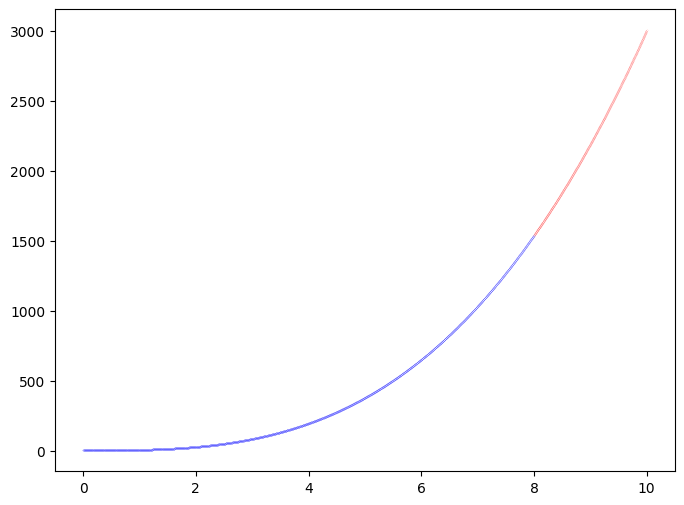

In [40]:
def plot_data(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,prediction=None):
    plt.figure(figsize=(8,6))
    plt.scatter(X_train,y_train,c='b',s=0.002,label="Traininng Data")
    plt.scatter(X_test,y_test,c='r',s=0.002,label="test data Data")
    if prediction is not None:
         plt.scatter(X_test,prediction,c='g',s=0.00002,label="predicted data Data")
         plt.legend()
plot_data()

In [41]:
W=np.random.randn(1,2)
b=np.random.randn(1,2)
print(W,b)

[[0.56243417 0.08911448]] [[1.45251505 2.15851313]]


In [42]:
def loss_fn(y_actual,y_predictions):
    return np.sum(np.square((y_actual-y_predictions)))/len(y_actual)

In [43]:
np.shape(X_train)

(2667, 1)

In [46]:
lr=0.001
epochs=3000
train_loss_values=[]
test_loss_values=[]
for epoch in range(epochs):
    #forward pass
    y_pred=np.dot(X_train,W)+b
    # compute loss
    train_loss=loss_fn(y_actual=y_train,y_predictions=y_pred)
    train_loss_values.append(train_loss)
    
    # gradient compute
    gradientW=(-2*np.sum((y_train-y_pred)*X_train))/len(y_pred)
    gradientb=(-2*np.sum((y_train-y_pred)))/len(y_pred)
    # back propagation
    W=W-lr*gradientW
    b=b-lr*gradientb
    # compute test loss
    test_pred=X_test*W+b
    test_loss=loss_fn(y_actual=y_test,y_predictions=test_pred)   
    test_loss_values.append(test_loss) 
    if epoch%10==0:
        print(f"Epoch: {epoch}, Train loss {train_loss:5f} test_loss {test_loss:5f}")

ValueError: operands could not be broadcast together with shapes (2667,) (2667,2) 

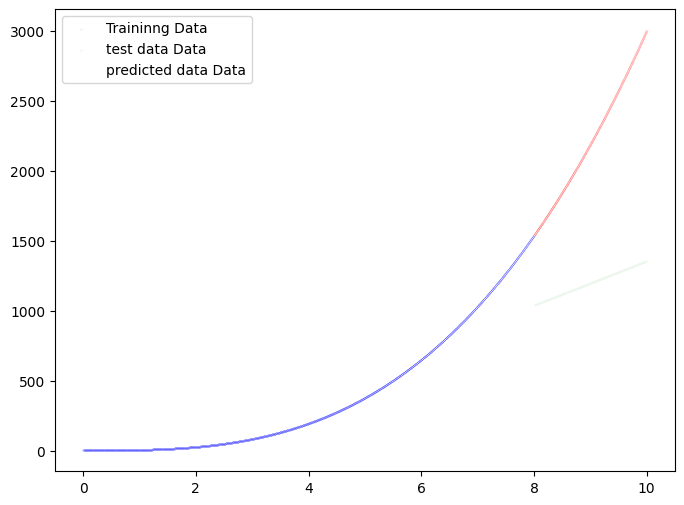

In [ ]:
y_pred=X_test*W+b
plot_data(prediction=y_pred)

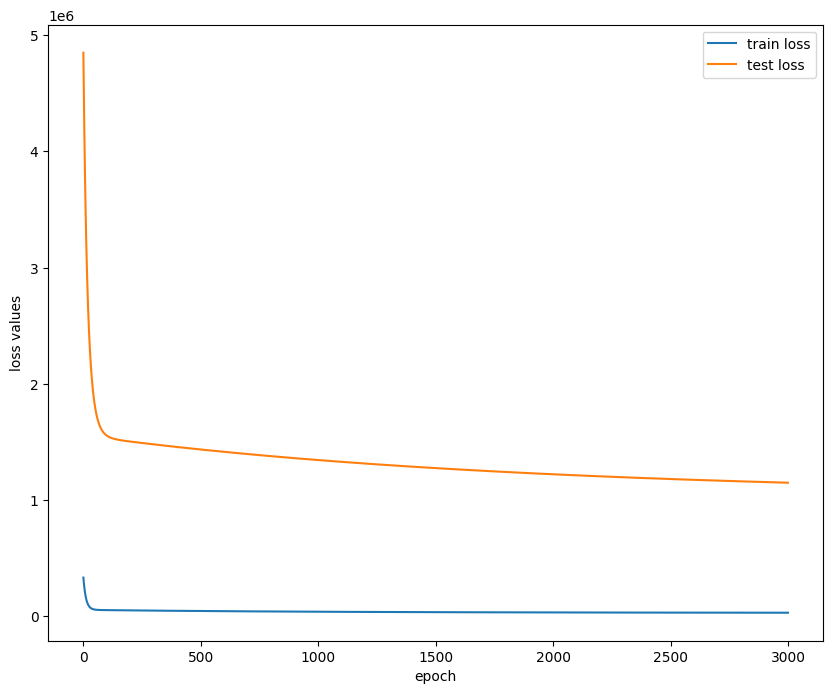

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(epochs),train_loss_values,label="train loss")
plt.plot(range(epochs),test_loss_values,label="test loss")
plt.xlabel("epoch")
plt.ylabel("loss values")
plt.legend()
